In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Downloads/rel_data.csv')

In [3]:
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,45.380600,47.715801,45.380600,47.715801,20.256132,30313300.0
1,2000-01-04,48.235802,51.525902,47.460499,51.525902,21.873579,60772935.0
2,2000-01-05,51.431301,54.229801,47.971100,53.984001,22.917086,103133236.0
3,2000-01-06,54.437801,56.631199,54.437801,55.392700,23.515106,63302094.0
4,2000-01-07,55.515598,59.817299,55.250900,59.278400,25.164652,80825460.0
...,...,...,...,...,...,...,...
5256,2020-12-29,2007.349976,2012.800049,1982.599976,1989.199951,1989.199951,250017.0
5257,2020-12-30,1992.550049,2006.849976,1975.900024,1995.500000,1995.500000,224277.0
5258,2020-12-31,1994.750000,2011.000000,1980.000000,1984.650024,1984.650024,465795.0
5259,2021-01-01,1986.150024,1997.300049,1982.300049,1987.150024,1987.150024,157713.0


In [4]:
df2 = pd.read_csv('/home/akshay/reliance_senti.csv')
df2['Date'] = pd.to_datetime(df2.Date)
df2

,Date,rescaled_sentiment
0,2016-06-01,0.51290
1,2016-06-02,0.51548
2,2016-06-03,0.51032
3,2016-06-04,0.50903
4,2016-06-05,0.50774
...,...,...
1703,2021-01-29,0.11750
1704,2021-01-30,0.85480
1705,2021-01-31,0.91580
1706,2021-02-01,0.07405


In [5]:
merged_data = pd.merge(df2,df,how='outer',on= 'Date')

In [6]:
merged_data

,Date,rescaled_sentiment,Open,High,Low,Close,Adj Close,Volume
0,2016-06-01,0.51290,479.399994,483.250000,475.625000,476.649994,466.023071,375492.0
1,2016-06-02,0.51548,478.049988,478.625000,472.625000,478.000000,467.343018,344552.0
2,2016-06-03,0.51032,478.750000,481.799988,477.700012,478.975006,468.296295,288778.0
3,2016-06-04,0.50903,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-06-05,0.50774,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5829,2016-05-25,NaN,474.600006,475.950012,470.799988,474.625000,464.043243,363358.0
5830,2016-05-26,NaN,475.274994,476.500000,472.125000,473.325012,462.772217,393860.0
5831,2016-05-27,NaN,475.750000,487.850006,474.750000,486.325012,475.482391,612816.0
5832,2016-05-30,NaN,487.500000,490.725006,483.000000,484.725006,473.918060,430578.0


In [7]:
merged_data = merged_data.dropna()

In [8]:
merged_data.reset_index(inplace = True)
merged_data

,index,Date,rescaled_sentiment,Open,High,Low,Close,Adj Close,Volume
0,0,2016-06-01,0.51290,479.399994,483.250000,475.625000,476.649994,466.023071,375492.0
1,1,2016-06-02,0.51548,478.049988,478.625000,472.625000,478.000000,467.343018,344552.0
2,2,2016-06-03,0.51032,478.750000,481.799988,477.700012,478.975006,468.296295,288778.0
3,5,2016-06-06,0.50645,479.500000,481.375000,476.500000,477.950012,467.294159,314868.0
4,6,2016-06-07,0.50516,478.000000,480.549988,475.899994,477.325012,466.683075,350534.0
...,...,...,...,...,...,...,...,...,...
1128,1672,2020-12-29,0.77870,2007.349976,2012.800049,1982.599976,1989.199951,1989.199951,250017.0
1129,1673,2020-12-30,0.88250,1992.550049,2006.849976,1975.900024,1995.500000,1995.500000,224277.0
1130,1674,2020-12-31,0.80620,1994.750000,2011.000000,1980.000000,1984.650024,1984.650024,465795.0
1131,1675,2021-01-01,0.27980,1986.150024,1997.300049,1982.300049,1987.150024,1987.150024,157713.0


In [9]:
merged_data.index = merged_data['Date']
merged_data.drop(merged_data.iloc[:, 0:2], inplace = True, axis = 1)
# merged_data.info()
merged_data

/home/akshay/anaconda3/envs/tf/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,rescaled_sentiment,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-06-01,0.51290,479.399994,483.250000,475.625000,476.649994,466.023071,375492.0
2016-06-02,0.51548,478.049988,478.625000,472.625000,478.000000,467.343018,344552.0
2016-06-03,0.51032,478.750000,481.799988,477.700012,478.975006,468.296295,288778.0
2016-06-06,0.50645,479.500000,481.375000,476.500000,477.950012,467.294159,314868.0
2016-06-07,0.50516,478.000000,480.549988,475.899994,477.325012,466.683075,350534.0
...,...,...,...,...,...,...,...
2020-12-29,0.77870,2007.349976,2012.800049,1982.599976,1989.199951,1989.199951,250017.0
2020-12-30,0.88250,1992.550049,2006.849976,1975.900024,1995.500000,1995.500000,224277.0
2020-12-31,0.80620,1994.750000,2011.000000,1980.000000,1984.650024,1984.650024,465795.0


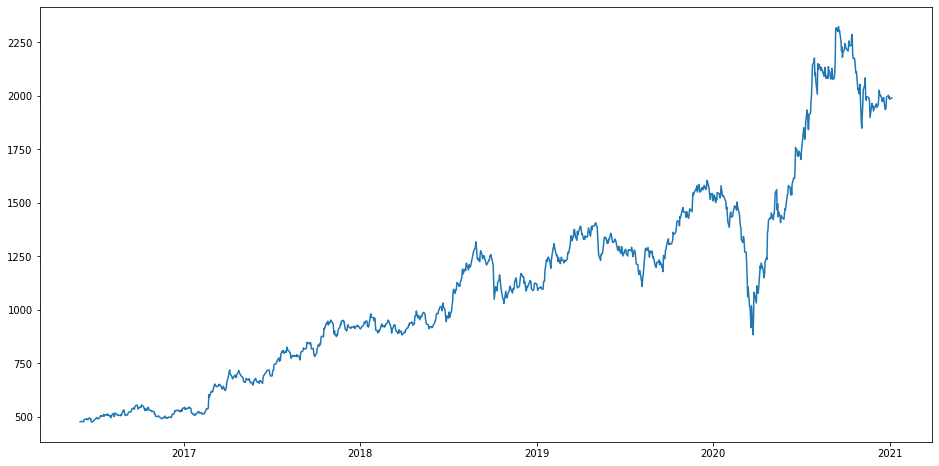

In [10]:
import matplotlib.pyplot as plt
# merged_data['Date'] = pd.to_datetime(merged_data.Date,format='%Y-%m-%d')
# df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(merged_data['Close'], label= 'Closing Price History')

In [11]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [12]:
# data = pd.DataFrame(index=(0,len(merged_data)),columns=['Date','Close','Volume','rescaled_sentiment'])
# for i in range(0,len(data)):
#     data['Date'][i] = merged_data['Date'][i]
#     data['Close'][i] = merged_data['Close'][i]
#     data['Volume'][i] = merged_data['Volume'][i]
#     data['rescaled_sentiment'][i] = merged_data['rescaled_sentiment'][i]
# data
data = merged_data[['rescaled_sentiment','Volume','Close']].copy()
data

,rescaled_sentiment,Volume,Close
Date,,,
2016-06-01,0.51290,375492.0,476.649994
2016-06-02,0.51548,344552.0,478.000000
2016-06-03,0.51032,288778.0,478.975006
2016-06-06,0.50645,314868.0,477.950012
2016-06-07,0.50516,350534.0,477.325012
...,...,...,...
2020-12-29,0.77870,250017.0,1989.199951
2020-12-30,0.88250,224277.0,1995.500000
2020-12-31,0.80620,465795.0,1984.650024


In [13]:
# train = data.iloc[0:900,:]
# valid = data.iloc[900:,:]
# train,valid
from pandas import DataFrame

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = DataFrame(scaler.fit_transform(data))
scaled_data.columns=['rescaled_sentiment','Volume','Close']
scaled_data

,rescaled_sentiment,Volume,Close
0,0.499647,0.000473,0.000487
1,0.502404,0.000434,0.001217
2,0.496891,0.000363,0.001745
3,0.492756,0.000396,0.001190
4,0.491378,0.000441,0.000852
...,...,...,...
1128,0.783640,0.000315,0.818922
1129,0.894545,0.000282,0.822331
1130,0.813022,0.000586,0.816460
1131,0.250593,0.000198,0.817813


In [15]:
# for i in range(60,len(train)):
x_train = scaled_data.iloc[0:900,:]
y_train = scaled_data.iloc[0:900,-1]
x_valid = scaled_data.iloc[900:,:]
y_valid = scaled_data.iloc[900:,-1] 
x_train, y_train = np.array(x_train), np.array(y_train)
x_valid, y_valid = np.array(x_valid), np.array(y_valid)
x_train = x_train.reshape(x_train.shape[0],1,3)
x_valid = x_valid.reshape(x_valid.shape[0],1,3)
print(x_train.shape,x_valid.shape,y_train.shape,y_valid.shape)
# print(x_train.shape[2])
#       st = []
# for i in range(60,inputs.shape[0]):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)
# # X_test
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# closing_price = model.predict(X_test)
# # # closing_price = scaler.inverse_transform(closing_price)
# closing_price

(900, 1, 3) (233, 1, 3) (900,) (233,)


In [16]:
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=85, batch_size=70, verbose=2,validation_data=(x_valid,y_valid))

Epoch 1/85
13/13 - 1s - loss: 0.0679 - val_loss: 0.2788
Epoch 2/85
13/13 - 0s - loss: 0.0258 - val_loss: 0.0824
Epoch 3/85
13/13 - 0s - loss: 0.0187 - val_loss: 0.1056
Epoch 4/85
13/13 - 0s - loss: 0.0128 - val_loss: 0.0569
Epoch 5/85
13/13 - 0s - loss: 0.0071 - val_loss: 0.0217
Epoch 6/85
13/13 - 0s - loss: 0.0025 - val_loss: 0.0011
Epoch 7/85
13/13 - 0s - loss: 3.8250e-04 - val_loss: 0.0031
Epoch 8/85
13/13 - 0s - loss: 1.4062e-04 - val_loss: 0.0057
Epoch 9/85
13/13 - 0s - loss: 9.4820e-05 - val_loss: 0.0040
Epoch 10/85
13/13 - 0s - loss: 5.3575e-05 - val_loss: 0.0027
Epoch 11/85
13/13 - 0s - loss: 5.0872e-05 - val_loss: 0.0027
Epoch 12/85
13/13 - 0s - loss: 4.7064e-05 - val_loss: 0.0032
Epoch 13/85
13/13 - 0s - loss: 4.5791e-05 - val_loss: 0.0032
Epoch 14/85
13/13 - 0s - loss: 4.4921e-05 - val_loss: 0.0029
Epoch 15/85
13/13 - 0s - loss: 4.2602e-05 - val_loss: 0.0028
Epoch 16/85
13/13 - 0s - loss: 4.1529e-05 - val_loss: 0.0027
Epoch 17/85
13/13 - 0s - loss: 4.0013e-05 - val_loss: 0.0

In [17]:
yhat = model.predict(x_valid)
x_valid = x_valid.reshape((x_valid.shape[0],3))
# x_valid,yhat
inv_yhat = pd.concat([DataFrame(x_valid[:,:2]),DataFrame(yhat)],axis = 1)
inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,-1]
# y_valid = y_valid.reshape(y_valid.shape[0],1)
inv_y = scaler.inverse_transform(x_valid)
# inv_y,inv_yhat
# print(sqrt(mean_squared_error(inv_y[:,2],inv_yhat[:,2])))

# x_valid.shape
# y_valid.shape
# sam= pd.concat([DataFrame(x_valid[:,:2]),DataFrame(y_valid)],axis = 1)
# sam

In [23]:
from sklearn.metrics import mean_squared_error 
realVals = inv_y[:,2]
predictedVals = inv_yhat[:,2]
mse = mean_squared_error(realVals, predictedVals)
print(mse)

5.832764797629996


In [24]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(realVals, predictedVals)

1.5478851943476046

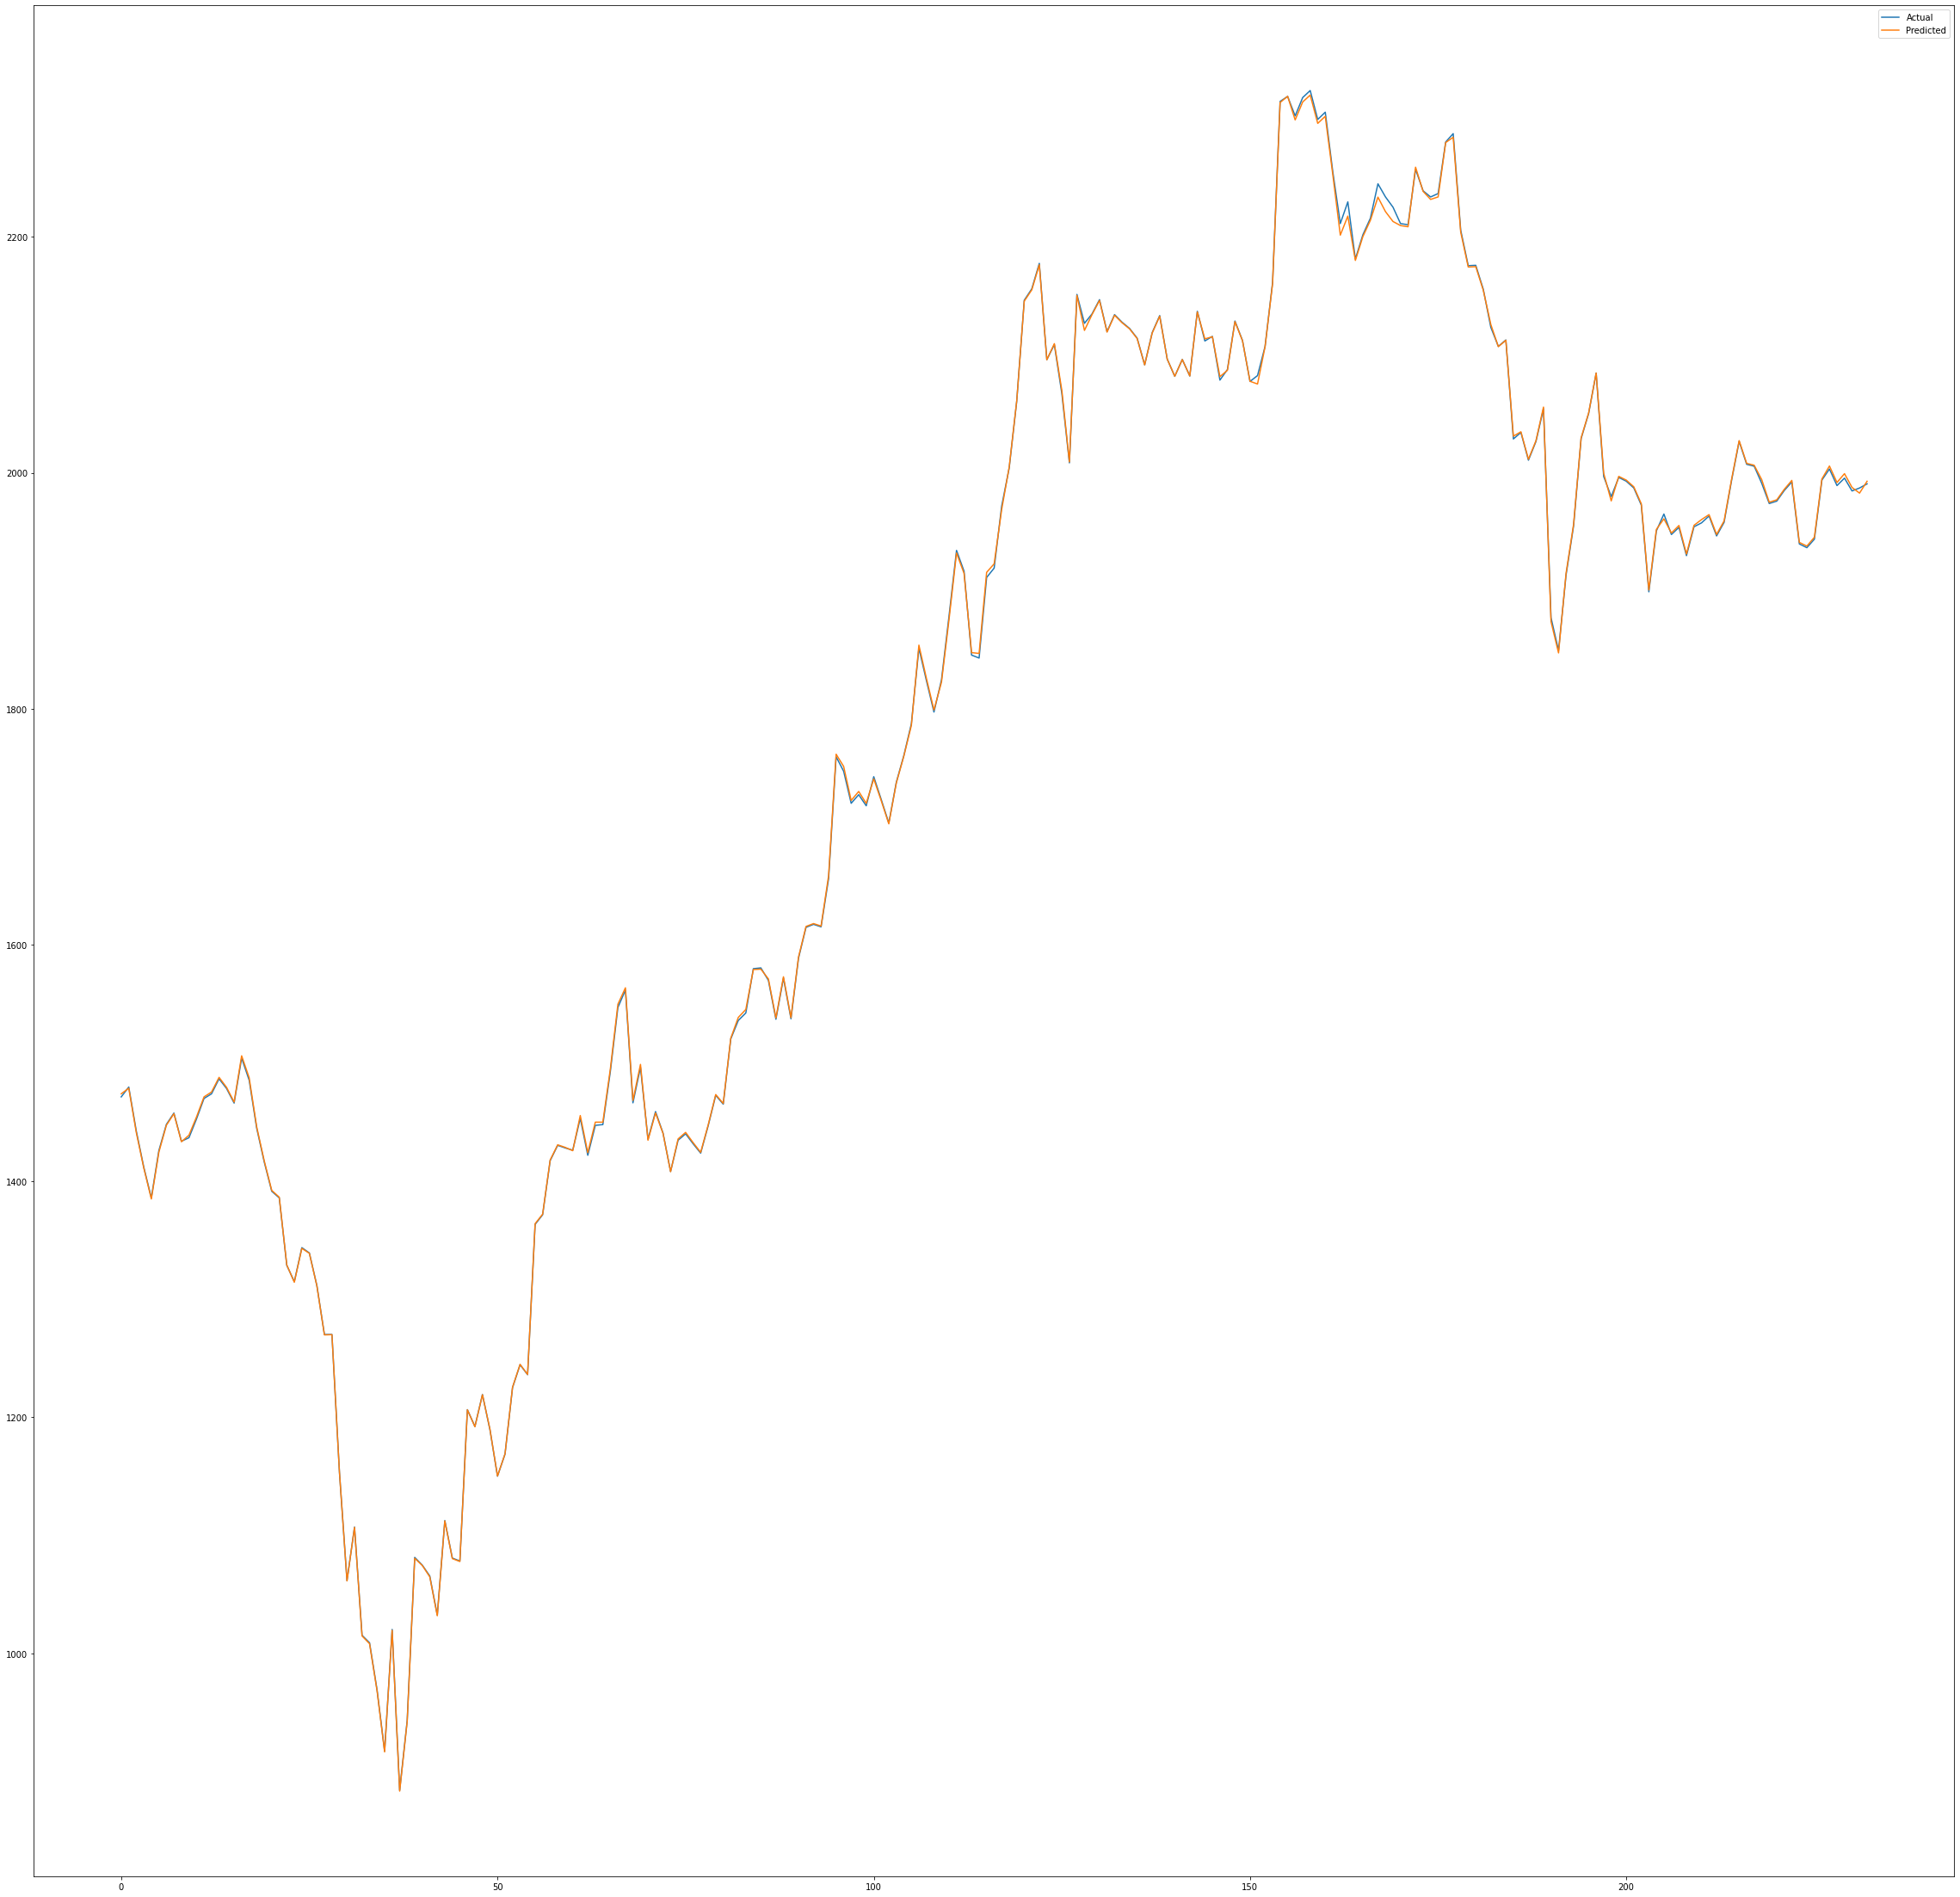

In [32]:
plt.figure(figsize=(40,40))
plt.plot(realVals,label = 'Actual')
plt.plot(predictedVals, label = 'Predicted')
plt.legend()
plt.show()